<a href="https://colab.research.google.com/github/pegahahadian/university/blob/main/main_of_datamining_exer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import f_oneway
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from google.colab import drive
drive.mount("/gdrive")

df = pd.read_csv('/gdrive/My Drive/immo_data.csv')

def use_mean(dataframe):
  for i in dataframe:
    if is_numeric_dtype(dataframe[i]) == True:
      dataframe[i].fillna(value=int(dataframe[i].mean()//1), inplace=True)
  print(dataframe) 

def use_most_occured(dataframe2):
  for i in dataframe2:
    if is_string_dtype(dataframe2[i]):
      a = dataframe2[i].mode()
      dataframe2[i].fillna(value= str(a) , inplace=True)
  print(dataframe2) 

def remove_rows(df):
  for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
      upper_range = df[cols].mean() + 3*df[cols].std()
      lower_range = df[cols].mean() - 3*df[cols].std()
      indexs = df[(df[cols]> upper_range) | (df[cols]<lower_range)].index
      df = df.drop(indexs)
  return df

def remove_columns(dataframe4):
  return dataframe4.select_dtypes(exclude=['object', 'bool'])

def change_to_array(dataframe5):
  return dataframe5.to_numpy()

use_most_occured(df)

use_mean(df)

mod_df = remove_rows(df)
array_df = change_to_array(remove_columns(mod_df))
print(array_df)

# for checking if nan sell(s) still are in array or not :
#print(np.argwhere(np.isnan(array_df)))
# and we got [] output that means our array are nan-empty!!!

array_df = array_df.T

corelation_matrix = np.empty([len(array_df), len(array_df)])

for row1 in range(0, len(array_df)):
  for row2 in range(0, len(array_df)):
    corelation_matrix[row1][row2] = scipy.stats.pearsonr(array_df[row1], array_df[row2])[0] 
print(corelation_matrix)

# first hyppthesis:
r1 = change_to_array(mod_df['livingSpace']).T
r2 = change_to_array(mod_df['baseRent']).T
print(scipy.stats.pearsonr(r1, r2))

# ANOVA :
ar1 = change_to_array(mod_df['picturecount']).T
ar2 = change_to_array(mod_df['pricetrend']).T
ar3 = change_to_array(mod_df['telekomUploadSpeed']).T

F, p = f_oneway(ar1, ar2, ar3)
print(F)
print(p)

# std :
print(mod_df['baseRent'].std() > mod_df['serviceCharge'].std())

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
                     regio1  serviceCharge  ... electricityKwhPrice   date
0       Nordrhein_Westfalen         245.00  ...                 NaN  May19
1           Rheinland_Pfalz         134.00  ...                 NaN  May19
2                   Sachsen         255.00  ...                 NaN  Oct19
3                   Sachsen          58.15  ...                 NaN  May19
4                    Bremen         138.00  ...                 NaN  Feb20
...                     ...            ...  ...                 ...    ...
268845               Bayern          90.00  ...                 NaN  Feb20
268846               Hessen         220.00  ...                 NaN  May19
268847               Hessen         220.00  ...                 NaN  Feb20
268848  Nordrhein_Westfalen         175.00  ...                 NaN  May19
268849               Hessen         315.00  ...             

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



[[ 1.00000000e+00             nan  2.07761199e-01  2.19911734e-01
   1.06587467e-02  5.91064915e-01  1.45051966e-01  4.74316481e-02
   1.10431594e-01  2.36353788e-01  6.16851828e-01  6.84662332e-01
   6.01217424e-01  1.47200403e-01  4.89669388e-01 -8.33546326e-02
   9.10114876e-04  1.07152506e-02  4.79433792e-01  6.58775712e-01
   1.78814382e-01  7.14994721e-02  1.70796934e-02  1.46576263e-02]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan]
 [ 2.07761199e-01             nan  1.00000000e+00  1.03129115e-01
   5.79581926e-03  2.37946086e-01  6.11149172e-03 -1.27522764e-02
   4.94276512e-02  6.37348610e-02  2.73559370e-01  2.61973385e-01
   2.945

In [ ]:
df.head()
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,serviceCharge,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
serviceCharge,1.000000,NaN,0.046733,0.060022,0.060660,0.062804,0.003177,0.003852,0.031655,0.015274,0.003659,0.038688,0.019392,0.063809,0.006722,0.041176,0.073436,0.168326,0.037697,0.050766,-0.019275,0.001953,0.002876,0.132928,0.013649,0.185364,0.011672,0.012626,0.005171,0.002497
telekomHybridUploadSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
newlyConst,0.046733,NaN,1.000000,0.148819,0.024229,0.150510,0.012492,0.003249,0.367071,0.094962,0.009830,0.043390,-0.004113,0.649395,0.006022,0.016984,0.323874,0.316112,0.084787,0.025642,-0.209682,-0.013281,0.001022,0.077723,0.003740,0.161220,0.020483,0.032536,-0.014286,0.012568
balcony,0.060022,NaN,0.148819,1.000000,0.118522,0.109151,0.012101,0.005474,0.236587,0.027626,0.006466,0.076179,0.174154,0.257138,0.003796,0.027546,0.214250,0.302079,0.084672,0.070366,-0.138351,0.006955,0.022042,0.203371,0.008642,0.254343,0.021557,0.038483,0.000669,-0.010753
picturecount,0.060660,NaN,0.024229,0.118522,1.000000,0.113162,0.007063,0.006367,0.008044,0.005922,0.006365,0.152019,0.051115,0.070370,0.004449,0.034586,0.090773,0.307180,0.024755,0.068663,-0.041019,-0.000477,0.004514,0.186509,0.109193,0.279490,0.037366,0.051611,0.015356,-0.017129
pricetrend,0.062804,NaN,0.150510,0.109151,0.113162,1.000000,0.031283,0.008045,0.117855,0.035387,0.007384,0.247049,-0.041648,0.188720,0.011995,0.022696,0.195699,0.509773,0.278610,0.012957,0.001545,0.009775,0.021470,0.023913,-0.044784,0.165159,0.015795,0.098886,0.001062,0.034458
telekomUploadSpeed,0.003177,NaN,0.012492,0.012101,0.007063,0.031283,1.000000,0.001468,-0.022947,0.107866,-0.007066,-0.013828,0.023915,-0.018031,-0.000163,-0.001543,0.011205,0.016807,-0.025696,-0.004495,0.003843,0.003337,0.005338,-0.008655,-0.007194,-0.012969,0.000443,0.001846,0.003712,-0.102565
totalRent,0.003852,NaN,0.003249,0.005474,0.006367,0.008045,0.001468,1.000000,0.004674,-0.003143,0.000996,0.002525,0.001163,0.008339,0.016133,0.001813,0.008055,0.016651,0.006442,0.003175,-0.003874,0.000183,0.000021,0.008402,-0.000443,0.014667,0.000994,0.001188,0.000343,-0.000612
yearConstructed,0.031655,NaN,0.367071,0.236587,0.008044,0.117855,-0.022947,0.004674,1.000000,0.030017,0.013839,0.083179,0.023011,0.736186,0.004035,0.008323,0.274407,0.200350,0.162156,0.011174,-0.211954,0.010271,0.011868,0.029853,-0.046753,0.073152,0.005065,0.055708,-0.027027,-0.011242
scoutId,0.015274,NaN,0.094962,0.027626,0.005922,0.035387,0.107866,-0.003143,0.030017,1.000000,-0.005615,-0.023631,-0.054887,0.051709,0.002583,0.005156,0.058539,0.081130,0.008044,0.012818,-0.027831,0.010558,0.006432,0.032601,-0.064769,0.035197,0.000107,0.043055,0.001276,-0.186057


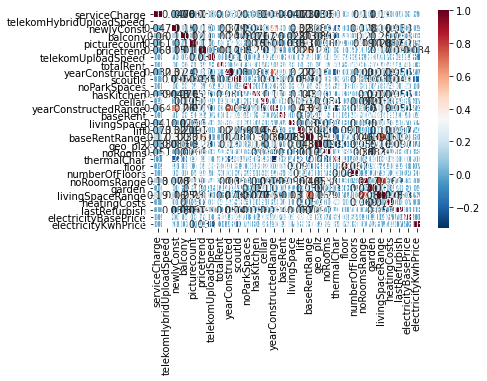

In [ ]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:

corr = df.corr() 
cm = sns.light_palette("green", as_cmap=True) 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2) 

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning:

All-NaN slice encountered



,serviceCharge,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
serviceCharge,1.00,nan,0.05,0.06,0.06,0.06,0.00,0.00,0.03,0.02,0.00,0.04,0.02,0.06,0.01,0.04,0.07,0.17,0.04,0.05,-0.02,0.00,0.00,0.13,0.01,0.19,0.01,0.01,0.01,0.00
telekomHybridUploadSpeed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
newlyConst,0.05,nan,1.00,0.15,0.02,0.15,0.01,0.00,0.37,0.09,0.01,0.04,-0.00,0.65,0.01,0.02,0.32,0.32,0.08,0.03,-0.21,-0.01,0.00,0.08,0.00,0.16,0.02,0.03,-0.01,0.01
balcony,0.06,nan,0.15,1.00,0.12,0.11,0.01,0.01,0.24,0.03,0.01,0.08,0.17,0.26,0.00,0.03,0.21,0.30,0.08,0.07,-0.14,0.01,0.02,0.20,0.01,0.25,0.02,0.04,0.00,-0.01
picturecount,0.06,nan,0.02,0.12,1.00,0.11,0.01,0.01,0.01,0.01,0.01,0.15,0.05,0.07,0.00,0.03,0.09,0.31,0.02,0.07,-0.04,-0.00,0.00,0.19,0.11,0.28,0.04,0.05,0.02,-0.02
pricetrend,0.06,nan,0.15,0.11,0.11,1.00,0.03,0.01,0.12,0.04,0.01,0.25,-0.04,0.19,0.01,0.02,0.20,0.51,0.28,0.01,0.00,0.01,0.02,0.02,-0.04,0.17,0.02,0.10,0.00,0.03
telekomUploadSpeed,0.00,nan,0.01,0.01,0.01,0.03,1.00,0.00,-0.02,0.11,-0.01,-0.01,0.02,-0.02,-0.00,-0.00,0.01,0.02,-0.03,-0.00,0.00,0.00,0.01,-0.01,-0.01,-0.01,0.00,0.00,0.00,-0.10
totalRent,0.00,nan,0.00,0.01,0.01,0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.02,0.01,0.00,-0.00,0.00,0.00,0.01,-0.00,0.01,0.00,0.00,0.00,-0.00
yearConstructed,0.03,nan,0.37,0.24,0.01,0.12,-0.02,0.00,1.00,0.03,0.01,0.08,0.02,0.74,0.00,0.01,0.27,0.20,0.16,0.01,-0.21,0.01,0.01,0.03,-0.05,0.07,0.01,0.06,-0.03,-0.01
scoutId,0.02,nan,0.09,0.03,0.01,0.04,0.11,-0.00,0.03,1.00,-0.01,-0.02,-0.05,0.05,0.00,0.01,0.06,0.08,0.01,0.01,-0.03,0.01,0.01,0.03,-0.06,0.04,0.00,0.04,0.00,-0.19


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



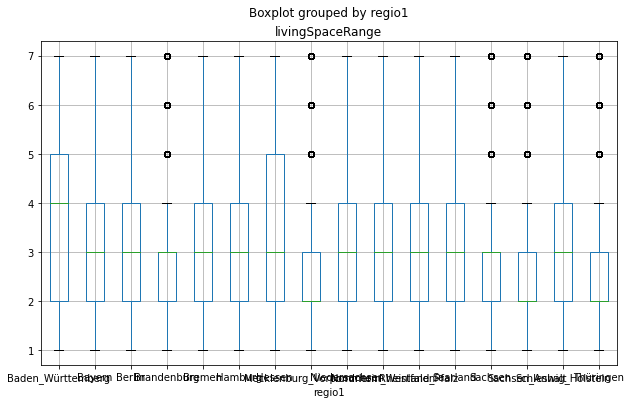

In [ ]:
import pandas as pd

data = pd.read_csv('/gdrive/MyDrive/immo_data.csv')


#Create a boxplot
data.boxplot('livingSpaceRange', by='regio1', figsize=(10, 6))

ctrl = data['livingSpaceRange'][data.regio1 == 'ctrl']

grps = pd.unique(data.regio1.values)
d_data = {grp:data['livingSpaceRange'][data.regio1 == grp] for grp in grps}

k = len(pd.unique(data.regio1))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('regio1').size()[0] #Participants in each condition